In [21]:
# This script is for DNN socio variables
# Take Dataset3 BUF for example

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
X_socio_test_passed_1 = pd.read_csv("../Data/01 Processed Dataset/Socio_BUF.csv") #input
X_sociodemo_test_passed = X_socio_test_passed_1.set_index('GEOID')
y = X_sociodemo_test_passed.pop('obesity_cr')

In [24]:
#X_sociodemo_test_passed.head()
y

GEOID
36029000500    38.6
36029000700    27.7
36029000900    30.8
36029001000    32.4
36029001100    33.4
               ... 
36029003901    45.9
36029005700    40.8
36029005900    39.0
36029016400    42.3
36029016700    33.5
Name: obesity_cr, Length: 77, dtype: float64

In [25]:
# new code
# sociodemographic predictors


y_dnn_socio_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_sociodemo_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_sociodemo_test_passed.iloc[train_index], X_sociodemo_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(160,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(224,activation="relu"),
        keras.layers.Dense(1)
    ])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_socio_predict = y_dnn_socio_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 0  4 10 35 45 47 53 66]
Epoch 1/50
2/2 - 0s - loss: 37.1927 - mean_squared_error: 1436.1172 - val_loss: 41.7028 - val_mean_squared_error: 1760.3438 - 314ms/epoch - 157ms/step
Epoch 2/50
2/2 - 0s - loss: 36.5621 - mean_squared_error: 1391.0496 - val_loss: 41.1108 - val_mean_squared_error: 1712.8781 - 33ms/epoch - 16ms/step
Epoch 3/50
2/2 - 0s - loss: 35.8842 - mean_squared_error: 1343.6562 - val_loss: 40.5045 - val_mean_squared_error: 1665.0159 - 18ms/epoch - 9ms/step
Epoch 4/50
2/2 - 0s - loss: 35.2448 - mean_squared_error: 1298.4221 - val_loss: 39.8735 - val_mean_squared_error: 1616.0890 - 20ms/epoch - 10ms/step
Epoch 5/50
2/2 - 0s - loss: 34.5049 - mean_squared_error: 1248.4332 - val_loss: 39.1888 - val_mean_squared_error: 1564.0898 - 19ms/epoch - 9ms/step
Epoch 6/50
2/2 - 0s - loss: 33.8177 - mean_squared_error: 1205.1772 - val_loss: 38.4509 - val_mean_squared_error: 1509.1825 - 18ms/epoch - 9ms/step
Epoch 7/50
2/2 - 0s - loss: 32.8874 - mean_squared_error: 1143.7742 - val_l

Epoch 16/50
2/2 - 0s - loss: 19.8222 - mean_squared_error: 504.8102 - val_loss: 27.2707 - val_mean_squared_error: 817.2399 - 18ms/epoch - 9ms/step
Epoch 17/50
2/2 - 0s - loss: 17.8537 - mean_squared_error: 421.0289 - val_loss: 25.4752 - val_mean_squared_error: 727.5384 - 18ms/epoch - 9ms/step
Epoch 18/50
2/2 - 0s - loss: 16.7141 - mean_squared_error: 372.5849 - val_loss: 23.5067 - val_mean_squared_error: 635.4630 - 18ms/epoch - 9ms/step
Epoch 19/50
2/2 - 0s - loss: 15.0470 - mean_squared_error: 313.7186 - val_loss: 21.3679 - val_mean_squared_error: 543.2709 - 17ms/epoch - 8ms/step
Epoch 20/50
2/2 - 0s - loss: 14.0822 - mean_squared_error: 274.7852 - val_loss: 19.7334 - val_mean_squared_error: 451.9606 - 17ms/epoch - 8ms/step
Epoch 21/50
2/2 - 0s - loss: 12.3817 - mean_squared_error: 219.0379 - val_loss: 17.9416 - val_mean_squared_error: 364.5455 - 17ms/epoch - 8ms/step
Epoch 22/50
2/2 - 0s - loss: 11.6617 - mean_squared_error: 187.0411 - val_loss: 16.0479 - val_mean_squared_error: 285.

Epoch 32/50
2/2 - 0s - loss: 6.1119 - mean_squared_error: 63.3288 - val_loss: 4.8955 - val_mean_squared_error: 46.2695 - 16ms/epoch - 8ms/step
Epoch 33/50
2/2 - 0s - loss: 6.1156 - mean_squared_error: 67.0376 - val_loss: 5.1937 - val_mean_squared_error: 48.4523 - 16ms/epoch - 8ms/step
Epoch 34/50
2/2 - 0s - loss: 5.8070 - mean_squared_error: 57.2348 - val_loss: 5.5278 - val_mean_squared_error: 52.1079 - 16ms/epoch - 8ms/step
Epoch 35/50
2/2 - 0s - loss: 5.5011 - mean_squared_error: 54.3284 - val_loss: 5.8600 - val_mean_squared_error: 57.3415 - 17ms/epoch - 8ms/step
Epoch 36/50
2/2 - 0s - loss: 4.9316 - mean_squared_error: 41.8025 - val_loss: 6.1250 - val_mean_squared_error: 64.0307 - 17ms/epoch - 9ms/step
Epoch 37/50
2/2 - 0s - loss: 5.2035 - mean_squared_error: 45.4236 - val_loss: 6.4417 - val_mean_squared_error: 72.1764 - 16ms/epoch - 8ms/step
Epoch 38/50
2/2 - 0s - loss: 5.1124 - mean_squared_error: 45.1065 - val_loss: 6.8401 - val_mean_squared_error: 80.6256 - 18ms/epoch - 9ms/step

Epoch 8/50
2/2 - 0s - loss: 31.6077 - mean_squared_error: 1061.9147 - val_loss: 39.1772 - val_mean_squared_error: 1542.7698 - 19ms/epoch - 9ms/step
Epoch 9/50
2/2 - 0s - loss: 30.6577 - mean_squared_error: 1006.5063 - val_loss: 38.3281 - val_mean_squared_error: 1477.0530 - 18ms/epoch - 9ms/step
Epoch 10/50
2/2 - 0s - loss: 29.3336 - mean_squared_error: 929.8914 - val_loss: 37.3944 - val_mean_squared_error: 1406.5095 - 19ms/epoch - 9ms/step
Epoch 11/50
2/2 - 0s - loss: 28.0847 - mean_squared_error: 865.2895 - val_loss: 36.3657 - val_mean_squared_error: 1330.8943 - 18ms/epoch - 9ms/step
Epoch 12/50
2/2 - 0s - loss: 26.6310 - mean_squared_error: 791.8594 - val_loss: 35.2338 - val_mean_squared_error: 1250.2461 - 17ms/epoch - 8ms/step
Epoch 13/50
2/2 - 0s - loss: 25.1566 - mean_squared_error: 724.1577 - val_loss: 34.0011 - val_mean_squared_error: 1165.4617 - 17ms/epoch - 8ms/step
Epoch 14/50
2/2 - 0s - loss: 23.6288 - mean_squared_error: 658.6324 - val_loss: 32.6598 - val_mean_squared_error

Epoch 22/50
2/2 - 0s - loss: 12.4593 - mean_squared_error: 206.1564 - val_loss: 15.2283 - val_mean_squared_error: 259.0455 - 18ms/epoch - 9ms/step
Epoch 23/50
2/2 - 0s - loss: 11.5881 - mean_squared_error: 168.0914 - val_loss: 13.3771 - val_mean_squared_error: 197.9216 - 19ms/epoch - 9ms/step
Epoch 24/50
2/2 - 0s - loss: 10.3649 - mean_squared_error: 142.6278 - val_loss: 11.6221 - val_mean_squared_error: 149.9087 - 19ms/epoch - 9ms/step
Epoch 25/50
2/2 - 0s - loss: 8.9982 - mean_squared_error: 112.8824 - val_loss: 9.9126 - val_mean_squared_error: 111.7769 - 19ms/epoch - 9ms/step
Epoch 26/50
2/2 - 0s - loss: 8.4688 - mean_squared_error: 104.2310 - val_loss: 8.3767 - val_mean_squared_error: 84.3219 - 19ms/epoch - 9ms/step
Epoch 27/50
2/2 - 0s - loss: 7.9897 - mean_squared_error: 114.3182 - val_loss: 7.1572 - val_mean_squared_error: 64.3365 - 17ms/epoch - 8ms/step
Epoch 28/50
2/2 - 0s - loss: 7.0611 - mean_squared_error: 97.4464 - val_loss: 6.3943 - val_mean_squared_error: 51.9315 - 19ms/

Epoch 38/50
2/2 - 0s - loss: 5.5893 - mean_squared_error: 59.8342 - val_loss: 8.0732 - val_mean_squared_error: 94.9111 - 17ms/epoch - 8ms/step
Epoch 39/50
2/2 - 0s - loss: 5.8621 - mean_squared_error: 58.3452 - val_loss: 8.3190 - val_mean_squared_error: 102.4805 - 17ms/epoch - 8ms/step
Epoch 40/50
2/2 - 0s - loss: 5.5735 - mean_squared_error: 59.0611 - val_loss: 8.4738 - val_mean_squared_error: 108.9287 - 16ms/epoch - 8ms/step
TEST: [11 32 43 57 59 69 72]
Epoch 1/50
2/2 - 0s - loss: 36.9025 - mean_squared_error: 1412.7075 - val_loss: 41.8920 - val_mean_squared_error: 1777.8585 - 324ms/epoch - 162ms/step
Epoch 2/50
2/2 - 0s - loss: 36.2617 - mean_squared_error: 1367.2795 - val_loss: 41.3300 - val_mean_squared_error: 1732.7986 - 27ms/epoch - 13ms/step
Epoch 3/50
2/2 - 0s - loss: 35.5720 - mean_squared_error: 1318.2163 - val_loss: 40.7626 - val_mean_squared_error: 1687.9827 - 16ms/epoch - 8ms/step
Epoch 4/50
2/2 - 0s - loss: 34.9772 - mean_squared_error: 1277.1656 - val_loss: 40.1685 - va

Epoch 14/50
2/2 - 0s - loss: 23.4006 - mean_squared_error: 633.0465 - val_loss: 29.3109 - val_mean_squared_error: 916.9340 - 17ms/epoch - 8ms/step
Epoch 15/50
2/2 - 0s - loss: 21.5774 - mean_squared_error: 565.6700 - val_loss: 27.7078 - val_mean_squared_error: 830.1064 - 17ms/epoch - 8ms/step
Epoch 16/50
2/2 - 0s - loss: 19.6334 - mean_squared_error: 485.0009 - val_loss: 25.9798 - val_mean_squared_error: 741.9962 - 17ms/epoch - 8ms/step
Epoch 17/50
2/2 - 0s - loss: 17.9249 - mean_squared_error: 429.8716 - val_loss: 24.1067 - val_mean_squared_error: 652.5818 - 17ms/epoch - 9ms/step
Epoch 18/50
2/2 - 0s - loss: 16.2095 - mean_squared_error: 360.4972 - val_loss: 22.0534 - val_mean_squared_error: 562.0515 - 18ms/epoch - 9ms/step
Epoch 19/50
2/2 - 0s - loss: 14.8596 - mean_squared_error: 305.0331 - val_loss: 19.9585 - val_mean_squared_error: 473.7769 - 17ms/epoch - 8ms/step
Epoch 20/50
2/2 - 0s - loss: 13.4364 - mean_squared_error: 260.6982 - val_loss: 18.2915 - val_mean_squared_error: 387.

Epoch 31/50
2/2 - 0s - loss: 7.3121 - mean_squared_error: 104.2033 - val_loss: 5.5722 - val_mean_squared_error: 53.7383 - 17ms/epoch - 9ms/step
Epoch 32/50
2/2 - 0s - loss: 7.0211 - mean_squared_error: 92.4853 - val_loss: 5.5840 - val_mean_squared_error: 52.2987 - 17ms/epoch - 8ms/step
Epoch 33/50
2/2 - 0s - loss: 7.6477 - mean_squared_error: 112.4145 - val_loss: 5.6776 - val_mean_squared_error: 51.6336 - 18ms/epoch - 9ms/step
Epoch 34/50
2/2 - 0s - loss: 6.5944 - mean_squared_error: 103.2428 - val_loss: 6.1472 - val_mean_squared_error: 54.2341 - 18ms/epoch - 9ms/step
Epoch 35/50
2/2 - 0s - loss: 6.2268 - mean_squared_error: 75.9506 - val_loss: 6.6153 - val_mean_squared_error: 59.1056 - 18ms/epoch - 9ms/step
Epoch 36/50
2/2 - 0s - loss: 6.2511 - mean_squared_error: 75.2399 - val_loss: 7.1067 - val_mean_squared_error: 66.2784 - 17ms/epoch - 8ms/step
Epoch 37/50
2/2 - 0s - loss: 5.7783 - mean_squared_error: 62.3842 - val_loss: 7.4802 - val_mean_squared_error: 73.2858 - 18ms/epoch - 9ms/s

In [22]:
# sociodemographic predictors

y_dnn_socio_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_sociodemo_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_sociodemo_test_passed.iloc[train_index], X_sociodemo_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(160,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(144,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(112,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(256,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(208,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(96,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(224,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(192,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(64,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, epochs=10, verbose=2)
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_socio_predict = y_dnn_socio_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 0  4 10 35 45 47 53 66]
Epoch 1/100
3/3 - 0s - loss: 1483.8507 - mean_squared_error: 1483.8507 - 443ms/epoch - 148ms/step
Epoch 2/100
3/3 - 0s - loss: 1435.9609 - mean_squared_error: 1435.9609 - 6ms/epoch - 2ms/step
Epoch 3/100
3/3 - 0s - loss: 1254.9178 - mean_squared_error: 1254.9178 - 5ms/epoch - 2ms/step
Epoch 4/100
3/3 - 0s - loss: 753.1725 - mean_squared_error: 753.1725 - 7ms/epoch - 2ms/step
Epoch 5/100
3/3 - 0s - loss: 355.7814 - mean_squared_error: 355.7814 - 5ms/epoch - 2ms/step
Epoch 6/100
3/3 - 0s - loss: 310.3695 - mean_squared_error: 310.3695 - 7ms/epoch - 2ms/step
Epoch 7/100
3/3 - 0s - loss: 133.8484 - mean_squared_error: 133.8484 - 6ms/epoch - 2ms/step
Epoch 8/100
3/3 - 0s - loss: 168.7325 - mean_squared_error: 168.7325 - 6ms/epoch - 2ms/step
Epoch 9/100
3/3 - 0s - loss: 77.7815 - mean_squared_error: 77.7815 - 5ms/epoch - 2ms/step
Epoch 10/100
3/3 - 0s - loss: 69.4605 - mean_squared_error: 69.4605 - 6ms/epoch - 2ms/step
Epoch 11/100
3/3 - 0s - loss: 69.3838 - m

Epoch 91/100
3/3 - 0s - loss: 8.2057 - mean_squared_error: 8.2057 - 6ms/epoch - 2ms/step
Epoch 92/100
3/3 - 0s - loss: 9.1061 - mean_squared_error: 9.1061 - 6ms/epoch - 2ms/step
Epoch 93/100
3/3 - 0s - loss: 10.9534 - mean_squared_error: 10.9534 - 5ms/epoch - 2ms/step
Epoch 94/100
3/3 - 0s - loss: 9.0992 - mean_squared_error: 9.0992 - 6ms/epoch - 2ms/step
Epoch 95/100
3/3 - 0s - loss: 12.3080 - mean_squared_error: 12.3080 - 5ms/epoch - 2ms/step
Epoch 96/100
3/3 - 0s - loss: 9.4814 - mean_squared_error: 9.4814 - 6ms/epoch - 2ms/step
Epoch 97/100
3/3 - 0s - loss: 6.9622 - mean_squared_error: 6.9622 - 5ms/epoch - 2ms/step
Epoch 98/100
3/3 - 0s - loss: 10.6326 - mean_squared_error: 10.6326 - 5ms/epoch - 2ms/step
Epoch 99/100
3/3 - 0s - loss: 10.4336 - mean_squared_error: 10.4336 - 5ms/epoch - 2ms/step
Epoch 100/100
3/3 - 0s - loss: 6.9006 - mean_squared_error: 6.9006 - 6ms/epoch - 2ms/step
TEST: [12 18 28 33 50 58 68 74]
Epoch 1/100
3/3 - 0s - loss: 1464.0381 - mean_squared_error: 1464.038

Epoch 81/100
3/3 - 0s - loss: 11.4214 - mean_squared_error: 11.4214 - 7ms/epoch - 2ms/step
Epoch 82/100
3/3 - 0s - loss: 22.4432 - mean_squared_error: 22.4432 - 5ms/epoch - 2ms/step
Epoch 83/100
3/3 - 0s - loss: 22.7909 - mean_squared_error: 22.7909 - 6ms/epoch - 2ms/step
Epoch 84/100
3/3 - 0s - loss: 10.3320 - mean_squared_error: 10.3320 - 5ms/epoch - 2ms/step
Epoch 85/100
3/3 - 0s - loss: 22.7110 - mean_squared_error: 22.7110 - 5ms/epoch - 2ms/step
Epoch 86/100
3/3 - 0s - loss: 30.3677 - mean_squared_error: 30.3677 - 6ms/epoch - 2ms/step
Epoch 87/100
3/3 - 0s - loss: 11.6573 - mean_squared_error: 11.6573 - 5ms/epoch - 2ms/step
Epoch 88/100
3/3 - 0s - loss: 15.6859 - mean_squared_error: 15.6859 - 6ms/epoch - 2ms/step
Epoch 89/100
3/3 - 0s - loss: 24.7108 - mean_squared_error: 24.7108 - 5ms/epoch - 2ms/step
Epoch 90/100
3/3 - 0s - loss: 12.4767 - mean_squared_error: 12.4767 - 6ms/epoch - 2ms/step
Epoch 91/100
3/3 - 0s - loss: 13.2383 - mean_squared_error: 13.2383 - 6ms/epoch - 2ms/step

Epoch 71/100
3/3 - 0s - loss: 8.4450 - mean_squared_error: 8.4450 - 5ms/epoch - 2ms/step
Epoch 72/100
3/3 - 0s - loss: 6.6514 - mean_squared_error: 6.6514 - 6ms/epoch - 2ms/step
Epoch 73/100
3/3 - 0s - loss: 8.5411 - mean_squared_error: 8.5411 - 6ms/epoch - 2ms/step
Epoch 74/100
3/3 - 0s - loss: 9.9869 - mean_squared_error: 9.9869 - 5ms/epoch - 2ms/step
Epoch 75/100
3/3 - 0s - loss: 7.3579 - mean_squared_error: 7.3579 - 6ms/epoch - 2ms/step
Epoch 76/100
3/3 - 0s - loss: 8.6462 - mean_squared_error: 8.6462 - 5ms/epoch - 2ms/step
Epoch 77/100
3/3 - 0s - loss: 13.0672 - mean_squared_error: 13.0672 - 6ms/epoch - 2ms/step
Epoch 78/100
3/3 - 0s - loss: 9.2692 - mean_squared_error: 9.2692 - 5ms/epoch - 2ms/step
Epoch 79/100
3/3 - 0s - loss: 10.6794 - mean_squared_error: 10.6794 - 5ms/epoch - 2ms/step
Epoch 80/100
3/3 - 0s - loss: 6.2788 - mean_squared_error: 6.2788 - 6ms/epoch - 2ms/step
Epoch 81/100
3/3 - 0s - loss: 7.5907 - mean_squared_error: 7.5907 - 5ms/epoch - 2ms/step
Epoch 82/100
3/3 

Epoch 61/100
3/3 - 0s - loss: 10.7339 - mean_squared_error: 10.7339 - 6ms/epoch - 2ms/step
Epoch 62/100
3/3 - 0s - loss: 12.1263 - mean_squared_error: 12.1263 - 6ms/epoch - 2ms/step
Epoch 63/100
3/3 - 0s - loss: 7.5005 - mean_squared_error: 7.5005 - 7ms/epoch - 2ms/step
Epoch 64/100
3/3 - 0s - loss: 9.8709 - mean_squared_error: 9.8709 - 5ms/epoch - 2ms/step
Epoch 65/100
3/3 - 0s - loss: 7.0597 - mean_squared_error: 7.0597 - 6ms/epoch - 2ms/step
Epoch 66/100
3/3 - 0s - loss: 10.7636 - mean_squared_error: 10.7636 - 5ms/epoch - 2ms/step
Epoch 67/100
3/3 - 0s - loss: 9.8143 - mean_squared_error: 9.8143 - 7ms/epoch - 2ms/step
Epoch 68/100
3/3 - 0s - loss: 13.5975 - mean_squared_error: 13.5975 - 6ms/epoch - 2ms/step
Epoch 69/100
3/3 - 0s - loss: 11.2820 - mean_squared_error: 11.2820 - 7ms/epoch - 2ms/step
Epoch 70/100
3/3 - 0s - loss: 11.1658 - mean_squared_error: 11.1658 - 6ms/epoch - 2ms/step
Epoch 71/100
3/3 - 0s - loss: 9.7350 - mean_squared_error: 9.7350 - 5ms/epoch - 2ms/step
Epoch 72/

3/3 - 0s - loss: 14.1853 - mean_squared_error: 14.1853 - 6ms/epoch - 2ms/step
Epoch 52/100
3/3 - 0s - loss: 10.4598 - mean_squared_error: 10.4598 - 5ms/epoch - 2ms/step
Epoch 53/100
3/3 - 0s - loss: 9.3789 - mean_squared_error: 9.3789 - 5ms/epoch - 2ms/step
Epoch 54/100
3/3 - 0s - loss: 8.8273 - mean_squared_error: 8.8273 - 6ms/epoch - 2ms/step
Epoch 55/100
3/3 - 0s - loss: 11.0955 - mean_squared_error: 11.0955 - 5ms/epoch - 2ms/step
Epoch 56/100
3/3 - 0s - loss: 10.2778 - mean_squared_error: 10.2778 - 6ms/epoch - 2ms/step
Epoch 57/100
3/3 - 0s - loss: 10.5525 - mean_squared_error: 10.5525 - 5ms/epoch - 2ms/step
Epoch 58/100
3/3 - 0s - loss: 9.2743 - mean_squared_error: 9.2743 - 5ms/epoch - 2ms/step
Epoch 59/100
3/3 - 0s - loss: 9.2766 - mean_squared_error: 9.2766 - 5ms/epoch - 2ms/step
Epoch 60/100
3/3 - 0s - loss: 9.6131 - mean_squared_error: 9.6131 - 5ms/epoch - 2ms/step
Epoch 61/100
3/3 - 0s - loss: 9.1183 - mean_squared_error: 9.1183 - 6ms/epoch - 2ms/step
Epoch 62/100
3/3 - 0s - 

Epoch 42/100
3/3 - 0s - loss: 12.9865 - mean_squared_error: 12.9865 - 6ms/epoch - 2ms/step
Epoch 43/100
3/3 - 0s - loss: 14.0471 - mean_squared_error: 14.0471 - 5ms/epoch - 2ms/step
Epoch 44/100
3/3 - 0s - loss: 11.0873 - mean_squared_error: 11.0873 - 6ms/epoch - 2ms/step
Epoch 45/100
3/3 - 0s - loss: 14.6633 - mean_squared_error: 14.6633 - 5ms/epoch - 2ms/step
Epoch 46/100
3/3 - 0s - loss: 18.3498 - mean_squared_error: 18.3498 - 6ms/epoch - 2ms/step
Epoch 47/100
3/3 - 0s - loss: 12.8175 - mean_squared_error: 12.8175 - 5ms/epoch - 2ms/step
Epoch 48/100
3/3 - 0s - loss: 15.9532 - mean_squared_error: 15.9532 - 6ms/epoch - 2ms/step
Epoch 49/100
3/3 - 0s - loss: 8.1666 - mean_squared_error: 8.1666 - 5ms/epoch - 2ms/step
Epoch 50/100
3/3 - 0s - loss: 11.2660 - mean_squared_error: 11.2660 - 5ms/epoch - 2ms/step
Epoch 51/100
3/3 - 0s - loss: 16.7959 - mean_squared_error: 16.7959 - 6ms/epoch - 2ms/step
Epoch 52/100
3/3 - 0s - loss: 10.7742 - mean_squared_error: 10.7742 - 5ms/epoch - 2ms/step
E

3/3 - 0s - loss: 20.3827 - mean_squared_error: 20.3827 - 5ms/epoch - 2ms/step
Epoch 33/100
3/3 - 0s - loss: 17.3670 - mean_squared_error: 17.3670 - 5ms/epoch - 2ms/step
Epoch 34/100
3/3 - 0s - loss: 16.3011 - mean_squared_error: 16.3011 - 6ms/epoch - 2ms/step
Epoch 35/100
3/3 - 0s - loss: 22.0046 - mean_squared_error: 22.0046 - 5ms/epoch - 2ms/step
Epoch 36/100
3/3 - 0s - loss: 16.4082 - mean_squared_error: 16.4082 - 6ms/epoch - 2ms/step
Epoch 37/100
3/3 - 0s - loss: 14.0042 - mean_squared_error: 14.0042 - 5ms/epoch - 2ms/step
Epoch 38/100
3/3 - 0s - loss: 13.9043 - mean_squared_error: 13.9043 - 5ms/epoch - 2ms/step
Epoch 39/100
3/3 - 0s - loss: 16.0801 - mean_squared_error: 16.0801 - 6ms/epoch - 2ms/step
Epoch 40/100
3/3 - 0s - loss: 15.2875 - mean_squared_error: 15.2875 - 4ms/epoch - 1ms/step
Epoch 41/100
3/3 - 0s - loss: 14.7073 - mean_squared_error: 14.7073 - 5ms/epoch - 2ms/step
Epoch 42/100
3/3 - 0s - loss: 16.9057 - mean_squared_error: 16.9057 - 6ms/epoch - 2ms/step
Epoch 43/100

Epoch 22/100
3/3 - 0s - loss: 34.6924 - mean_squared_error: 34.6924 - 5ms/epoch - 2ms/step
Epoch 23/100
3/3 - 0s - loss: 26.5776 - mean_squared_error: 26.5776 - 6ms/epoch - 2ms/step
Epoch 24/100
3/3 - 0s - loss: 24.9043 - mean_squared_error: 24.9043 - 6ms/epoch - 2ms/step
Epoch 25/100
3/3 - 0s - loss: 34.5037 - mean_squared_error: 34.5037 - 5ms/epoch - 2ms/step
Epoch 26/100
3/3 - 0s - loss: 33.2735 - mean_squared_error: 33.2735 - 7ms/epoch - 2ms/step
Epoch 27/100
3/3 - 0s - loss: 28.8801 - mean_squared_error: 28.8801 - 5ms/epoch - 2ms/step
Epoch 28/100
3/3 - 0s - loss: 24.4941 - mean_squared_error: 24.4941 - 6ms/epoch - 2ms/step
Epoch 29/100
3/3 - 0s - loss: 19.2642 - mean_squared_error: 19.2642 - 5ms/epoch - 2ms/step
Epoch 30/100
3/3 - 0s - loss: 21.8811 - mean_squared_error: 21.8811 - 6ms/epoch - 2ms/step
Epoch 31/100
3/3 - 0s - loss: 22.8146 - mean_squared_error: 22.8146 - 6ms/epoch - 2ms/step
Epoch 32/100
3/3 - 0s - loss: 14.7819 - mean_squared_error: 14.7819 - 5ms/epoch - 2ms/step

Epoch 13/100
3/3 - 0s - loss: 69.8527 - mean_squared_error: 69.8527 - 5ms/epoch - 2ms/step
Epoch 14/100
3/3 - 0s - loss: 58.8693 - mean_squared_error: 58.8693 - 5ms/epoch - 2ms/step
Epoch 15/100
3/3 - 0s - loss: 42.3740 - mean_squared_error: 42.3740 - 5ms/epoch - 2ms/step
Epoch 16/100
3/3 - 0s - loss: 49.9868 - mean_squared_error: 49.9868 - 6ms/epoch - 2ms/step
Epoch 17/100
3/3 - 0s - loss: 42.5981 - mean_squared_error: 42.5981 - 5ms/epoch - 2ms/step
Epoch 18/100
3/3 - 0s - loss: 35.8405 - mean_squared_error: 35.8405 - 6ms/epoch - 2ms/step
Epoch 19/100
3/3 - 0s - loss: 37.2747 - mean_squared_error: 37.2747 - 5ms/epoch - 2ms/step
Epoch 20/100
3/3 - 0s - loss: 36.2575 - mean_squared_error: 36.2575 - 5ms/epoch - 2ms/step
Epoch 21/100
3/3 - 0s - loss: 44.7494 - mean_squared_error: 44.7494 - 6ms/epoch - 2ms/step
Epoch 22/100
3/3 - 0s - loss: 28.2588 - mean_squared_error: 28.2588 - 5ms/epoch - 2ms/step
Epoch 23/100
3/3 - 0s - loss: 26.0510 - mean_squared_error: 26.0510 - 5ms/epoch - 2ms/step

Epoch 4/100
3/3 - 0s - loss: 742.2479 - mean_squared_error: 742.2479 - 5ms/epoch - 2ms/step
Epoch 5/100
3/3 - 0s - loss: 331.9697 - mean_squared_error: 331.9697 - 6ms/epoch - 2ms/step
Epoch 6/100
3/3 - 0s - loss: 242.9003 - mean_squared_error: 242.9003 - 5ms/epoch - 2ms/step
Epoch 7/100
3/3 - 0s - loss: 158.8239 - mean_squared_error: 158.8239 - 6ms/epoch - 2ms/step
Epoch 8/100
3/3 - 0s - loss: 177.4780 - mean_squared_error: 177.4780 - 5ms/epoch - 2ms/step
Epoch 9/100
3/3 - 0s - loss: 98.1092 - mean_squared_error: 98.1092 - 5ms/epoch - 2ms/step
Epoch 10/100
3/3 - 0s - loss: 161.3411 - mean_squared_error: 161.3411 - 5ms/epoch - 2ms/step
Epoch 11/100
3/3 - 0s - loss: 80.3276 - mean_squared_error: 80.3276 - 5ms/epoch - 2ms/step
Epoch 12/100
3/3 - 0s - loss: 120.3139 - mean_squared_error: 120.3139 - 5ms/epoch - 2ms/step
Epoch 13/100
3/3 - 0s - loss: 111.4851 - mean_squared_error: 111.4851 - 5ms/epoch - 2ms/step
Epoch 14/100
3/3 - 0s - loss: 57.8825 - mean_squared_error: 57.8825 - 4ms/epoch 

Epoch 95/100
3/3 - 0s - loss: 11.3307 - mean_squared_error: 11.3307 - 5ms/epoch - 2ms/step
Epoch 96/100
3/3 - 0s - loss: 7.2768 - mean_squared_error: 7.2768 - 5ms/epoch - 2ms/step
Epoch 97/100
3/3 - 0s - loss: 7.6819 - mean_squared_error: 7.6819 - 6ms/epoch - 2ms/step
Epoch 98/100
3/3 - 0s - loss: 10.1158 - mean_squared_error: 10.1158 - 7ms/epoch - 2ms/step
Epoch 99/100
3/3 - 0s - loss: 6.5945 - mean_squared_error: 6.5945 - 6ms/epoch - 2ms/step
Epoch 100/100
3/3 - 0s - loss: 4.4867 - mean_squared_error: 4.4867 - 4ms/epoch - 1ms/step


In [11]:
dnn_socio_rmse = mean_squared_error(y_true , y_dnn_socio_predict, squared=False)
dnn_socio_r2 = r2_score(y_true, y_dnn_socio_predict)
avg_r_squared = avg_r_squared/10

In [12]:
# sociodemographic - 10 epochs
print("RMSE of the DNN model with sociodemographic predictors: "+str(dnn_socio_rmse))
print("R2 of the DNN model with sociodemographic predictors: "+str(dnn_socio_r2)) # for R2, I use this one.
print("R2 of the DNN model with sociodemographic predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model with sociodemographic predictors: 12.573073701924432
R2 of the DNN model with sociodemographic predictors: -2.2678988054775546
R2 of the DNN model with sociodemographic predictors (avg): -3.211807982880708


In [26]:
# Yingjie Run
dnn_socio_rmse = mean_squared_error(y_true , y_dnn_socio_predict, squared=False)
dnn_socio_r2 = r2_score(y_true, y_dnn_socio_predict)
avg_r_squared = avg_r_squared/10

In [27]:
# sociodemographic - 10 epochs
print("RMSE of the DNN model with sociodemographic predictors: "+str(dnn_socio_rmse))
print("R2 of the DNN model with sociodemographic predictors: "+str(dnn_socio_r2)) # for R2, I use this one.
print("R2 of the DNN model with sociodemographic predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model with sociodemographic predictors: 11.002044472131107
R2 of the DNN model with sociodemographic predictors: -1.502260205094884
R2 of the DNN model with sociodemographic predictors (avg): -2.1660404012025234


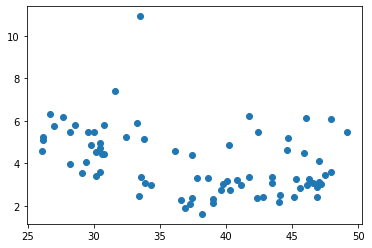

In [17]:
plt.scatter(y_true, y_dnn_socio_predict)

In [27]:
y_dnn_socio_predict.index(82.18547821044922)

39

In [29]:
y_dnn_socio_predict_test = y_dnn_socio_predict.pop(39)

In [32]:
y_true.pop(39)

33.5

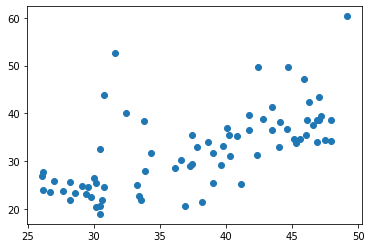

In [33]:
plt.scatter(y_true, y_dnn_socio_predict)

In [34]:
r2_score(y_true, y_dnn_socio_predict)

-0.4737464907203883